Final Centroids (Cluster Centers):
[[7.5 6.5]
 [2.5 3. ]]

Cluster Assignments:
Point A: Cluster 2
Point B: Cluster 2
Point C: Cluster 1
Point D: Cluster 1
Point E: Cluster 1
Point F: Cluster 1


C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


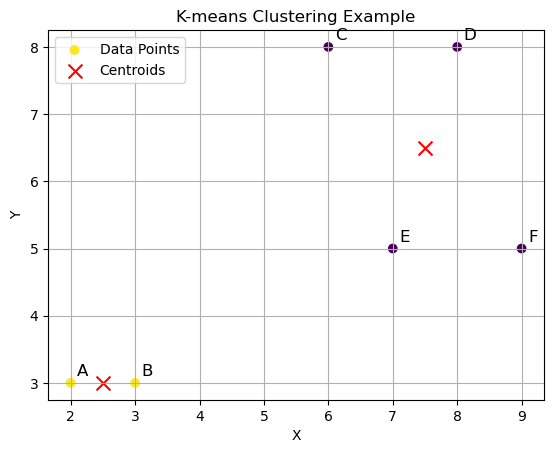

In [13]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans


 
# Define the data points (A, B, C, D, E, F)

data = np.array([

    [2, 3],  # Point A

    [3, 3],  # Point B

    [6, 8],  # Point C

    [8, 8],  # Point D

    [7, 5],  # Point E

    [9, 5]   # Point F

])
 
# Perform K-means clustering with K=2

kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
 
# Get the cluster centers (centroids) and labels

centroids = kmeans.cluster_centers_

labels = kmeans.labels_
 
# Print the final centroids and cluster assignments

print("Final Centroids (Cluster Centers):")

print(centroids)
 
print("\nCluster Assignments:")

for i, label in enumerate(labels):

    print(f"Point {chr(65+i)}: Cluster {label+1}")
 
# Plot the data points and the centroids

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
 
# Annotate points

for i, point in enumerate(data):

    plt.text(point[0]+0.1, point[1]+0.1, f'{chr(65+i)}', fontsize=12)
 
plt.title('K-means Clustering Example')

plt.xlabel('X')

plt.ylabel('Y')

plt.legend()

plt.grid(True)

plt.show()

 

Final Centroids (Cluster Centers):
[[7.5 6.5]
 [2.5 3. ]]

Cluster Assignments:
Point A: Cluster 2, Distance: 0.50
Point B: Cluster 2, Distance: 0.50
Point C: Cluster 1, Distance: 2.12
Point D: Cluster 1, Distance: 1.58
Point E: Cluster 1, Distance: 1.58
Point F: Cluster 1, Distance: 2.12


C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


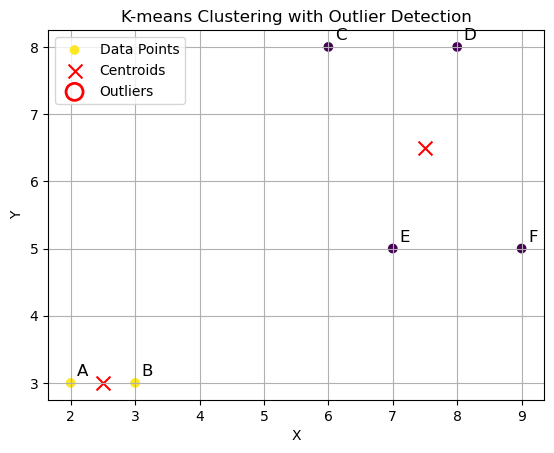

In [11]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the data points (A, B, C, D, E, F)
data = np.array([
    [2, 3],  # Point A
    [3, 3],  # Point B
    [6, 8],  # Point C
    [8, 8],  # Point D
    [7, 5],  # Point E
    [9, 5]   # Point F
])

# Perform K-means clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(data)

# Get cluster centers and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Compute Euclidean distance of each point from its cluster centroid
distances = np.linalg.norm(data - centroids[labels], axis=1)

# Define outliers as points with distance greater than 95th percentile
threshold = np.percentile(distances, 95)
outliers = distances > threshold

# Print the final centroids and cluster assignments
print("Final Centroids (Cluster Centers):")
print(centroids)

print("\nCluster Assignments:")
for i, (label, dist, is_outlier) in enumerate(zip(labels, distances, outliers)):
    status = " (Outlier)" if is_outlier else ""
    print(f"Point {chr(65+i)}: Cluster {label+1}, Distance: {dist:.2f}{status}")

# Plot the data points, centroids, and outliers
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')

# Highlight outliers
plt.scatter(data[outliers, 0], data[outliers, 1], edgecolors='red', facecolors='none', s=150, linewidth=2, label='Outliers')

# Annotate points
for i, point in enumerate(data):
    plt.text(point[0] + 0.1, point[1] + 0.1, f'{chr(65+i)}', fontsize=12)

plt.title('K-means Clustering with Outlier Detection')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()
